### Import necessary libraries

In [1]:

from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Preprocess data

In [15]:

df = pd.read_csv(r'd:\DaneshKar\Project_Eden\Clean_Loan.csv')

# نمایش داده‌ها
df.head(10)

,Dependents,Education,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,BoxCox_Loan_Amount_Term
0,0,1,1.0,2,1,1,0,0,8.674197,0.000000,4.859812,1.623179e+07
1,1,1,1.0,0,0,1,1,0,8.430327,7.319202,4.859812,1.623179e+07
2,0,1,1.0,2,1,1,1,1,8.006701,0.000000,4.204693,1.623179e+07
3,0,0,1.0,2,1,1,1,0,7.857094,7.765993,4.795791,1.623179e+07
4,0,1,1.0,2,1,1,0,0,8.699681,0.000000,4.955827,1.623179e+07
5,2,1,1.0,2,1,1,1,1,8.597482,8.342125,5.590987,1.623179e+07
6,0,0,1.0,2,1,1,1,0,7.755339,7.324490,4.564348,1.623179e+07
7,3,1,0.0,1,0,1,1,0,8.018625,7.826044,5.068904,1.623179e+07
8,2,1,1.0,2,1,1,1,0,8.295798,7.331060,5.129899,1.623179e+07
9,1,1,1.0,1,0,1,1,0,9.460476,9.302828,5.857933,1.623179e+07


In [16]:
df2 = pd.read_csv(r'd:\DaneshKar\Project_Eden\Clean_Test.csv')

# نمایش داده‌ها
df2.head(10)

,Dependents,Education,Credit_History,Property_Area,Gender_Male,Married_Yes,Self_Employed_Yes,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,BoxCox_Loan_Amount_Term
0,0,1,1.0,2,1,1,0,8.651899,0.000000,4.709530,1.757278e+07
1,1,1,1.0,2,1,1,0,8.031710,7.313887,4.844187,1.757278e+07
2,2,1,1.0,2,1,1,0,8.517393,7.496097,5.342334,1.757278e+07
3,2,1,1.0,2,1,1,0,7.758333,7.842671,4.615121,1.757278e+07
4,0,0,1.0,2,1,0,0,8.094684,0.000000,4.369448,1.757278e+07
5,0,0,1.0,2,1,1,1,7.680637,8.138273,5.030438,1.757278e+07
6,1,0,1.0,1,0,0,0,7.708411,0.000000,4.094345,1.757278e+07
7,2,0,0.0,0,1,1,0,8.264106,0.000000,4.997212,1.757278e+07
8,2,1,1.0,2,1,1,0,9.520322,0.000000,5.638355,5.185310e+06
9,0,0,1.0,1,1,0,0,7.783641,7.783641,4.820282,1.757278e+07


In [17]:
df.describe()

,Dependents,Education,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,BoxCox_Loan_Amount_Term
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02
mean,0.755000,0.786667,0.861667,1.033333,0.690000,0.818333,0.653333,0.133333,8.343915,4.273370,4.869311,1.520262e+07
std,1.011606,0.410003,0.345538,0.785228,0.462879,0.385891,0.476306,0.340218,0.649093,3.877099,0.494390,5.755526e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.017280,0.000000,2.302585,7.422095e+02
25%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.966066,0.000000,4.634729,1.623179e+07
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.246565,7.047395,4.859812,1.623179e+07
75%,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,8.668497,7.723223,5.111988,1.623179e+07
max,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,11.302217,10.637489,6.552508,3.846388e+07


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               600 non-null    int64  
 1   Education                600 non-null    int64  
 2   Credit_History           600 non-null    float64
 3   Property_Area            600 non-null    int64  
 4   Loan_Status              600 non-null    int64  
 5   Gender_Male              600 non-null    int64  
 6   Married_Yes              600 non-null    int64  
 7   Self_Employed_Yes        600 non-null    int64  
 8   Log_ApplicantIncome      600 non-null    float64
 9   Log_CoapplicantIncome    600 non-null    float64
 10  Log_LoanAmount           600 non-null    float64
 11  BoxCox_Loan_Amount_Term  600 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 56.4 KB


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               361 non-null    int64  
 1   Education                361 non-null    int64  
 2   Credit_History           361 non-null    float64
 3   Property_Area            361 non-null    int64  
 4   Gender_Male              361 non-null    int64  
 5   Married_Yes              361 non-null    int64  
 6   Self_Employed_Yes        361 non-null    int64  
 7   Log_ApplicantIncome      361 non-null    float64
 8   Log_CoapplicantIncome    361 non-null    float64
 9   Log_LoanAmount           361 non-null    float64
 10  BoxCox_Loan_Amount_Term  361 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 31.2 KB


# Split data into features and labels (for train set)

In [20]:
Loan = df
Test = df2

In [21]:
X2 = df2

# Standardize features

In [23]:
from sklearn.preprocessing import StandardScaler
# Exclude 'Loan_Status' from standardizing
columns_to_standardize = [col for col in Loan.select_dtypes(include=['float64', 'int64']).columns if col != 'Loan_Status']

scaler = StandardScaler()

# Fit on training data and transform both training and test data
Loan[columns_to_standardize] = scaler.fit_transform(Loan[columns_to_standardize])
Test[columns_to_standardize] = scaler.transform(Test[columns_to_standardize])

In [11]:
# columns_to_standardize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
# scaler = StandardScaler()
# X[columns_to_standardize] = scaler.fit_transform(X[columns_to_standardize])
# X_train_scaled = X
# X2[columns_to_standardize] = scaler.transform(X2[columns_to_standardize])
# X_test_scaled = X2

In [24]:
Loan.head(10)

,Dependents,Education,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,BoxCox_Loan_Amount_Term
0,-0.746961,0.520756,0.400676,1.232092,1,0.471164,-1.372813,-0.392232,0.509261,-1.103128,-0.019229,0.178964
1,0.242391,0.520756,0.400676,-1.317064,0,0.471164,0.728431,-0.392232,0.133239,0.786251,-0.019229,0.178964
2,-0.746961,0.520756,0.400676,1.232092,1,0.471164,0.728431,2.549510,-0.519949,-1.103128,-1.345442,0.178964
3,-0.746961,-1.920286,0.400676,1.232092,1,0.471164,0.728431,-0.392232,-0.750627,0.901586,-0.148834,0.178964
4,-0.746961,0.520756,0.400676,1.232092,1,0.471164,-1.372813,-0.392232,0.548556,-1.103128,0.175141,0.178964
5,1.231743,0.520756,0.400676,1.232092,1,0.471164,0.728431,2.549510,0.390975,1.050309,1.460948,0.178964
6,-0.746961,-1.920286,0.400676,1.232092,1,0.471164,0.728431,-0.392232,-0.907523,0.787616,-0.617362,0.178964
7,2.221095,0.520756,-2.495780,-0.042486,0,0.471164,0.728431,-0.392232,-0.501562,0.917087,0.404053,0.178964
8,1.231743,0.520756,0.400676,1.232092,1,0.471164,0.728431,-0.392232,-0.074191,0.789312,0.527529,0.178964
9,0.242391,0.520756,0.400676,-0.042486,0,0.471164,0.728431,-0.392232,1.721623,1.298305,2.001350,0.178964


In [25]:
Test.head(10)

,Dependents,Education,Credit_History,Property_Area,Gender_Male,Married_Yes,Self_Employed_Yes,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,BoxCox_Loan_Amount_Term
0,-0.746961,0.520756,0.400676,1.232092,0.471164,0.728431,-0.392232,0.474880,-1.103128,-0.323458,0.412151
1,0.242391,0.520756,0.400676,1.232092,0.471164,0.728431,-0.392232,-0.481387,0.784879,-0.050861,0.412151
2,1.231743,0.520756,0.400676,1.232092,0.471164,0.728431,-0.392232,0.267486,0.831915,0.957580,0.412151
3,1.231743,0.520756,0.400676,1.232092,0.471164,0.728431,-0.392232,-0.902906,0.921380,-0.514579,0.412151
4,-0.746961,-1.920286,0.400676,1.232092,0.471164,-1.372813,-0.392232,-0.384288,-1.103128,-1.011915,0.412151
5,-0.746961,-1.920286,0.400676,1.232092,0.471164,0.728431,2.549510,-1.022705,0.997686,0.326182,0.412151
6,0.242391,-1.920286,0.400676,-0.042486,-2.122401,-1.372813,-0.392232,-0.979882,-1.103128,-1.568829,0.412151
7,1.231743,-1.920286,-2.495780,-1.317064,0.471164,0.728431,-0.392232,-0.123057,-1.103128,0.258921,0.412151
8,1.231743,0.520756,0.400676,1.232092,0.471164,0.728431,-0.392232,1.813899,-1.103128,1.556839,-1.741920
9,-0.746961,-1.920286,0.400676,-0.042486,0.471164,-1.372813,-0.392232,-0.863885,0.906141,-0.099255,0.412151


In [30]:
X = Loan.drop('Loan_Status', axis=1)
y = Loan['Loan_Status']

In [31]:
X

,Dependents,Education,Credit_History,Property_Area,Gender_Male,Married_Yes,Self_Employed_Yes,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,BoxCox_Loan_Amount_Term
0,-0.746961,0.520756,0.400676,1.232092,0.471164,-1.372813,-0.392232,0.509261,-1.103128,-0.019229,0.178964
1,0.242391,0.520756,0.400676,-1.317064,0.471164,0.728431,-0.392232,0.133239,0.786251,-0.019229,0.178964
2,-0.746961,0.520756,0.400676,1.232092,0.471164,0.728431,2.549510,-0.519949,-1.103128,-1.345442,0.178964
3,-0.746961,-1.920286,0.400676,1.232092,0.471164,0.728431,-0.392232,-0.750627,0.901586,-0.148834,0.178964
4,-0.746961,0.520756,0.400676,1.232092,0.471164,-1.372813,-0.392232,0.548556,-1.103128,0.175141,0.178964
...,...,...,...,...,...,...,...,...,...,...,...
595,-0.746961,0.520756,0.400676,-1.317064,-2.122401,-1.372813,-0.392232,-0.572204,-1.103128,-1.199740,0.178964
596,2.221095,0.520756,0.400676,-1.317064,0.471164,0.728431,-0.392232,-0.036183,-1.103128,-2.339658,-2.289358
597,0.242391,0.520756,0.400676,1.232092,0.471164,0.728431,-0.392232,1.005881,0.312718,1.352335,0.178964
598,1.231743,0.520756,0.400676,1.232092,0.471164,0.728431,-0.392232,0.909537,-1.103128,0.743213,0.178964


In [32]:
y

0      1
1      0
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    0
Name: Loan_Status, Length: 600, dtype: int64

# Split into train and test sets

In [33]:
# Splitting into train-test(validation) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Apply SMOTE to balance the dataset

In [34]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define Cross-Validation folds and scorer

In [35]:
cv_folds = 5
f1_scorer = make_scorer(f1_score, pos_label=1)

In [36]:
# Evaluate accuracy and F1 scores
accuracy_results = {}

### Logistic Regression
Logistic regression is a linear model useful for binary classification tasks, especially with class imbalance, when combined with class weights.

In [37]:
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')
logistic_cv_scores = cross_val_score(logistic_model, X_resampled, y_resampled, cv=cv_folds, scoring=f1_scorer)
logistic_model.fit(X_resampled, y_resampled)
logistic_pred = logistic_model.predict(X_resampled)
accuracy_results['Logistic Regression'] = accuracy_score(y_resampled, logistic_pred)

In [38]:
accuracy_score(y_resampled, logistic_pred)

0.716012084592145

In [39]:
#CV
np.mean(cross_val_score(logistic_model, X_resampled, y_resampled, cv=cv_folds, scoring=f1_scorer))

np.float64(0.7278949859513698)

In [40]:
#LeaveOneOut
scores = cross_val_score(logistic_model, X_resampled, y_resampled, cv=LeaveOneOut())
np.mean(scores)

np.float64(0.7009063444108762)

In [41]:
#KFold
scores = cross_val_score(logistic_model, X_resampled, y_resampled, cv=KFold(n_splits= 5, shuffle= True,random_state= 42))
scores

array([0.66165414, 0.76691729, 0.68181818, 0.6969697 , 0.68939394])

In [42]:
logistic_cv_scores

array([0.75      , 0.72108844, 0.71428571, 0.76129032, 0.69281046])

### K-Nearest Neighbors (KNN)
KNN is a non-parametric algorithm that classifies based on the majority class of nearest neighbors.

In [43]:
knn_model = KNeighborsClassifier(n_neighbors=17)
knn_cv_scores = cross_val_score(knn_model, X_resampled, y_resampled, cv=cv_folds, scoring=f1_scorer)
knn_model.fit(X_resampled, y_resampled)
knn_pred = knn_model.predict(X_test)
accuracy_results['KNN'] = accuracy_score(y_test, knn_pred)


In [25]:
# neighbors = np.arange(1,20)
# train_accuracy = np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))

# for i,k in enumerate(neighbors):
#     #Setup a knn classifier with k neighbors
#     knn_model = KNeighborsClassifier(n_neighbors=k)
    
#     #Fit the model
#     knn_model.fit(X_resampled, y_resampled)
    
#     #Compute accuracy on the training set
#     train_accuracy[i] = knn_model.score(X_resampled, y_resampled)
    
#     #Compute accuracy on the test set
#     test_accuracy[i] = knn_model.score(X_test, y_test)

# knn_cv_scores = cross_val_score(knn_model, X_resampled, y_resampled, cv=cv_folds, scoring=f1_scorer)   
# knn_pred = knn_model.predict(X_resampled)
# accuracy_results['KNN'] = accuracy_score(y_resampled, knn_pred)

In [26]:
# import matplotlib.pyplot as plt
# #Generate plot
# plt.title('k-NN Varying number of neighbors')
# plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
# plt.plot(neighbors, train_accuracy, label='Training accuracy')
# plt.legend()
# plt.xlabel('Number of neighbors')
# plt.ylabel('Accuracy')
# plt.show()

In [44]:
print("F1-scores for each fold in KNN:", knn_cv_scores)

F1-scores for each fold in KNN: [0.70422535 0.75862069 0.75342466 0.76923077 0.73417722]


In [45]:
accuracy_score(y_test, knn_pred)

0.6583333333333333

In [46]:
#CV
np.mean(cross_val_score(knn_model, X_resampled, y_resampled, cv=cv_folds, scoring=f1_scorer))

np.float64(0.7439357367445475)

In [47]:
#LeaveOneOut
scores = cross_val_score(knn_model, X_resampled, y_resampled, cv=LeaveOneOut())
np.mean(scores)

np.float64(0.7220543806646526)

In [48]:
#KFold
scores = cross_val_score(knn_model, X_resampled, y_resampled, cv=KFold(n_splits= 5, shuffle= True,random_state= 42))
scores

array([0.63157895, 0.7443609 , 0.73484848, 0.75      , 0.71212121])

# Random Forest
Random Forest is an ensemble learning method using multiple decision trees and supports handling imbalance via class weights.

In [49]:
random_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced')

random_forest_model.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [50]:
rf_pred = random_forest_model.predict(X_test)
accuracy_results['Random Forest'] = accuracy_score(y_test, rf_pred)
accuracy_score(y_test, rf_pred)

0.7833333333333333

In [51]:
rf_cv_scores = cross_val_score(random_forest_model, X_resampled, y_resampled, cv=cv_folds, scoring=f1_scorer)

In [52]:
print("F1-scores for each fold in rf:", rf_cv_scores)

F1-scores for each fold in rf: [0.78947368 0.79452055 0.79411765 0.8976378  0.82926829]


In [53]:
#CV
np.mean(cross_val_score(random_forest_model, X_resampled, y_resampled, cv=cv_folds, scoring=f1_scorer))

np.float64(0.8210035934346145)

In [54]:
#LeaveOneOut
scores = cross_val_score(random_forest_model, X_resampled, y_resampled, cv=LeaveOneOut())
np.mean(scores)

np.float64(0.8202416918429003)

In [55]:
#KFold
scores = cross_val_score(random_forest_model, X_resampled, y_resampled, cv=KFold(n_splits= 5, shuffle= True,random_state= 42))
scores

array([0.84210526, 0.77443609, 0.8030303 , 0.78787879, 0.84090909])

### Artificial Neural Network (ANN)
ANN uses multiple layers to model complex patterns. Manual cross-validation is performed to ensure robust evaluation.

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import keras

In [79]:
keras.utils.set_random_seed(9)
ann_model = Sequential([
    Dense(64, input_dim=X_resampled.shape[1], activation='relu'),  # لایه ورودی
    BatchNormalization(),  # نرمال‌سازی برای بهبود پایداری یادگیری
    Dropout(0.3),  # جلوگیری از Overfitting
    Dense(32, activation='relu'),  # لایه مخفی اول
    Dropout(0.3),  # Dropout اضافه برای استحکام مدل
    Dense(8, activation='relu'),  # لایه مخفی دوم
    # Dropout(0.3),  # Dropout اضافه برای استحکام مدل
    # Dense(8, activation='relu'), 
    Dense(1, activation='sigmoid')  # لایه خروجی
])
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

d:\DaneshKar\Project_Eden\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
# Early Stopping برای جلوگیری از Overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ReduceLROnPlateau برای کاهش نرخ یادگیری به صورت پویا
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

In [81]:
history = ann_model.fit(
    X_resampled, y_resampled,
    epochs=50,  # افزایش تعداد epoch
    batch_size=32,  # سایز دسته داده
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler],  # استفاده از Callback‌ها
    verbose=1
)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5059 - loss: 0.8191 - val_accuracy: 0.5917 - val_loss: 0.6711 - learning_rate: 0.0010
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5832 - loss: 0.7052 - val_accuracy: 0.5000 - val_loss: 0.6751 - learning_rate: 0.0010
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6020 - loss: 0.6734 - val_accuracy: 0.5500 - val_loss: 0.6621 - learning_rate: 0.0010
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6573 - loss: 0.6168 - val_accuracy: 0.5833 - val_loss: 0.6471 - learning_rate: 0.0010
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6824 - loss: 0.5967 - val_accuracy: 0.6333 - val_loss: 0.6285 - learning_rate: 0.0010
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6525 - loss: 0.5989 - val_accuracy: 0.6417 - val_loss: 0.6203 - learning_rate: 0.0010
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6883 - loss: 0.5758 - val_accuracy:

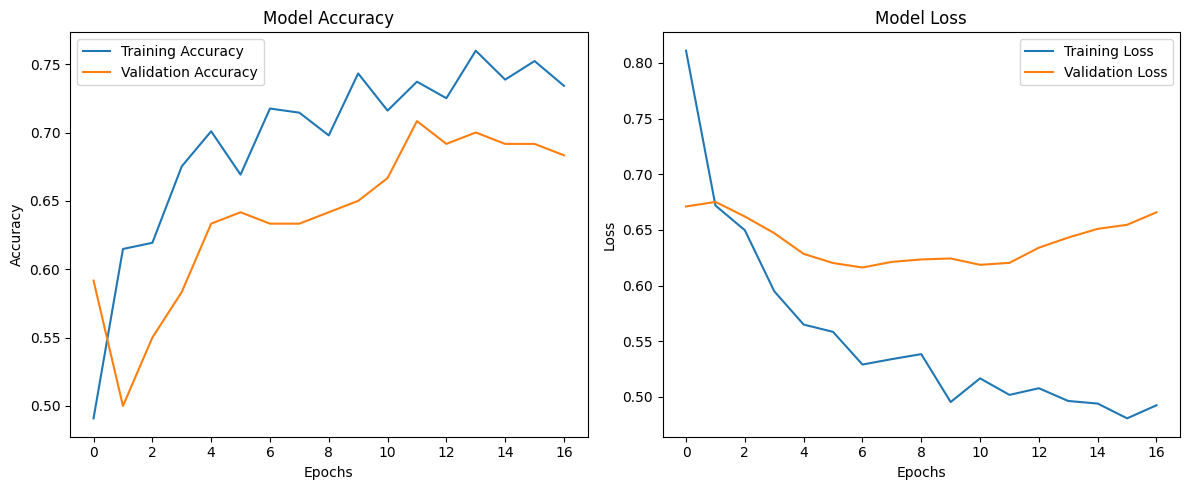

In [82]:

# رسم دقت
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# رسم Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


# Manual cross-validation for ANN

In [83]:
ann_cv_scores = []
for train_idx, val_idx in KFold(n_splits=cv_folds, random_state=42, shuffle=True).split(X_resampled):
    # اگر داده‌های شما pandas DataFrame است:
    X_train_cv, X_val_cv = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    y_train_cv, y_val_cv = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]
    
    # مدل ANN را آموزش می‌دهیم
    ann_model.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=0)
    
    # پیش‌بینی‌ها را انجام می‌دهیم
    y_pred_cv = (ann_model.predict(X_val_cv) > 0.5).astype(int)
    
    # F1-score را محاسبه کرده و ذخیره می‌کنیم
    ann_cv_scores.append(f1_score(y_val_cv, y_pred_cv, pos_label=1))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [84]:
ann_pred = (ann_model.predict(X_resampled) > 0.5).astype(int).flatten()
accuracy_results['ANN'] = accuracy_score(y_resampled, ann_pred)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [85]:
accuracy_score(y_resampled, ann_pred)

0.8277945619335347

In [86]:
ann_cv_scores

[0.7131782945736435,
 0.8235294117647058,
 0.7659574468085106,
 0.8031496062992126,
 0.8472222222222222]

### Evaluate and predict
Aggregate and compare F1 scores from cross-validation, and make predictions on the test data.

In [208]:
# # Standardize test data
# df2_scaled = scaler.transform(df2)

In [74]:
# Output results
results = {
    'Logistic Regression': np.mean(logistic_cv_scores),
    'KNN': np.mean(knn_cv_scores),
    'Random Forest': np.mean(rf_cv_scores),
    # 'XGBoost': np.mean(f1),
    'ANN': np.mean(ann_cv_scores)
}

In [78]:
# Predict labels for the test dataset using each model
test_predictions = {
    'Logistic Regression': logistic_model.predict(Test),
    'KNN': knn_model.predict(Test),
    'Random Forest': random_forest_model.predict(Test),
    'ANN': (ann_model.predict(Test) > 0.5).astype(int).flatten()
}

results

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


{'Logistic Regression': np.float64(0.7278949859513698),
 'KNN': np.float64(0.7439357367445475),
 'Random Forest': np.float64(0.8210035934346145),
 'ANN': np.float64(0.7794135983951204)}

In [76]:
# Display both Accuracy and F1 score
accuracy_results

{'Logistic Regression': 0.716012084592145,
 'KNN': 0.6583333333333333,
 'Random Forest': 0.7833333333333333,
 'ANN': 0.8006042296072508}